# <center> <span style="color:indigo">        Escuela de ML y DL Módulo 1</span> </center> 
##  <center> <span style="color:DarkBlue">          Tarea 4: K-medoids</span>  </center>
##  <center> <span style="color:DarkBlue"> Nombre y Apellidos: Norma Paulina Lopez Zamora </span>  </center>
##  <center> <span style="color:DarkBlue"> Correo electrónico: paulinalopezn1@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> Abril 2024</span>  </center>

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>
2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>
4. <span style="color:DarkBlue">Conclusiones </span>
5. <span style="color:DarkBlue">Referencias</span>

## <span style="color:DarkciónBlue"> 1. Planteamiento del problema</span>

Haciendo uso de la práctica 4-Kmeans y el dataset que se mostró en clase, construya un modelo K-medoids para hacer clustering igual a lo visto en la sesión. Obtenga las métricas de inercia y silhouette. Haga el análisis comparativo entre ambos modelos. Documente sus resultados (añada gráficas).

## <span style="color:DarkciónBlue"> 2. Planteamiento de la solución</span>
Se siguieron los pasos de la practica 4 para ontener un modelo usando K-medoids

## <span style="color:DarkciónBlue"> 3. Código</span>
A continuación se presenta el código y los diferentes pasos en "contenido" para llegar al resultado final 

# Contenido
## &nbsp;&nbsp;1. Preparar los datos
## &nbsp;&nbsp;2. Análisis Exploratorio de Datos (EDA)
## &nbsp;&nbsp;3. Limpieza de datos
## &nbsp;&nbsp;4. Inicia ML no supervisado
## &nbsp;&nbsp;5. Construir modelo
## &nbsp;&nbsp;6. Graficar resultados
## &nbsp;&nbsp;7. Método Silhouette
## &nbsp;&nbsp;8. Actividad- k-medoids
---

# 1. Preparar los datos: Aprendizaje no supervisado K-means 

In [762]:
#Dataset Kaggle
#

%matplotlib inline
import os
import zipfile
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [763]:
#Se puede utilizar para indicar una ruta del archivo, podemos indicar la ruta 
Path = ""

In [764]:
#Se renombra el archivo para que sea más claro cuál es el que se usa. Vea el insiso e de la parte 3 de la práctica 0
with zipfile.ZipFile(Path+'OnlineRetail.zip', 'r') as archive:
    archive.extractall(Path)

In [765]:
#Mostrar la ruta del csv
#os.listdir(Path)

In [766]:
o_retail = pd.read_csv(Path+"OnlineRetail.csv", encoding="ISO-8859-1")#leer el archivo

In [767]:
o_retail.head()#para visualizar las columnas, #tiene un numero de factura, codigo, descripcion, cantidad, fecha de factura, precio unitario, 
#ID y paois 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


## 2. Análisis Exploratorio de Datos (EDA)

In [768]:
o_retail.describe()#ANALISIS EXPLORATIORIO DE DATOS, vemos que el minimo en cantidad es negativo, lo cual se explica que el pedido no se ha surtido pero que ya esta solicitado

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## &nbsp;&nbsp;3. Limpieza de datos

In [769]:
o_retail["CustomerID"] = o_retail["CustomerID"].fillna(0)#buscamos valores nulos y los rellenamos con 0

In [770]:
o_retail.info() #Revisar diferencia InvoiceNo y CustomerID
#vemos que invoicedate es un objetivo y necesitamos que se fecha, ya qyue esta como cadena
#customer id se puede convertir para que no sea flotante y qe sea cadena 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'EIRE'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Portugal'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'Lithuania'),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Iceland'),
  Text(16, 0, 'Channel Islands'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Cyprus'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'Finland'),
  Text(23, 0, 'Bahrain'),
  Text(24, 0, 'Greece'),
  Text(25, 0, 'Hong Kong'),
  Text(26, 0, 'Singapore'),
  Text(27, 0, 'Lebanon'),
  Text(28, 0, 'United Arab Emirates'),
  Text(2

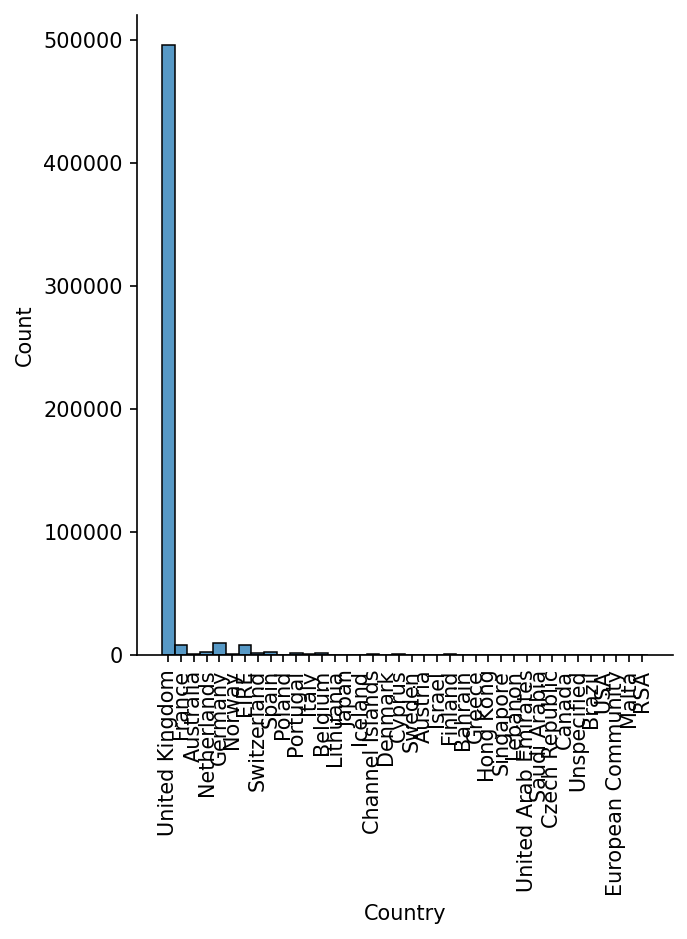

In [771]:
#print(o_retail["Country"].value_counts())#ventas de productos por pais
P = sns.displot(data=o_retail["Country"])
P.fig.set_dpi(150)
plt.xticks(rotation=90) #rotar etiquetas para que no quede encimado


In [772]:
#Eliminamos elementos nulos del dataset
o_retail.dropna(inplace=True)
o_retail.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,11507.851471
std,218.007598,96.889628,6760.792031
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12367.000000
50%,3.000000,2.080000,14390.000000
75%,10.000000,4.130000,16261.000000
max,80995.000000,38970.000000,18287.000000


In [773]:
#Vemos la cantidad de valores unicos que tiene cada columna
for i in o_retail:
    print(i, o_retail[i].nunique())

InvoiceNo 24446
StockCode 3958
Description 4223
Quantity 671
InvoiceDate 22309
UnitPrice 1630
CustomerID 4373
Country 38


## Agregar pedidos por adelantado

Existen muchas compras hechas por adelantado, eso quiere decir que al consumidor se le DEBEN entregar n cantidad de articulos, por eso, en la columna Quantity hay valores negativos (cantidad de articulos que se deben). Para eliminar esto, se agregará una nueva columna que indique si la compra es por adelantada o no

In [774]:
o_retail[o_retail["Quantity"] < 0]#vemos aquellos pedidos donde se ha hechos compras por adelantado

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [775]:
"""def status(df):
    #Seleccionamos los valores negativos en Quantity
    df["Status"] = 1 #"Bought"
    aux = df[df["Quantity"] < 0]
    for i in aux.index:
        df.loc[i, "Quantity"] = -1*(df.loc[i, "Quantity"])
        df.loc[i, "Status"] = 0 #"Credit"
    return df"""

def status(quantity):#si la cantidad es menor a 0 se va a surtit, si es mayor a 0 ya esta surtida 
    if quantity < 0:
        quantity = quantity*(-1)
        return 0 #"Credit"
    return 1


In [776]:
o_retail["Status"] = o_retail.apply(lambda Row: status(Row["Quantity"]), axis=1)

In [777]:
o_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1


In [778]:
o_retail["Status"].value_counts()

Status
1    530693
0      9762
Name: count, dtype: int64

In [779]:
o_retail[o_retail["Status"] == 0] #Crédito, Falta de stock

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom,0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom,0
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom,0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom,0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom,0


In [780]:
# Cambiar el dtype de CustomerID a str
o_retail['CustomerID'] = o_retail['CustomerID'].astype(str)

In [781]:
o_retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Status           int64
dtype: object

### Agregar una columna de monto total, multiplicando Quantity * UnitPrice

In [782]:
o_retail['AmountTotal'] = o_retail['Quantity']*o_retail['UnitPrice']#vamos a obtenener el costo, cantidaad x precio por unidad

In [783]:
o_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,AmountTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,20.34


In [784]:
#o_retail[o_retail["AmountTotal"] < 0]#vemos aquellos pedidos donde se ha hechos compras por adelantado

## Cambiar el tipo de formato de la columna InvoiceDate a que sea date type

In [785]:
o_retail['InvoiceDate'] = pd.to_datetime(o_retail['InvoiceDate'],format='%d-%m-%Y %H:%M')#datetime transforma a formato de fecha

In [786]:
o_retail.dtypes#verificamos que ya esta en formato de fecha 

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Status                  int64
AmountTotal           float64
dtype: object

In [787]:
o_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,AmountTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34


Crear una columna que muestre la última actividad de cada cliente, con respecto a la fecha más reciente del Dataset

In [788]:
#Fecha más reciente
#crea una columna co n las fechas, la ma´s actual que tiene de venta para despues restar la fecha mas vieja 
dateMax = o_retail['InvoiceDate'].max()
print(dateMax)

2011-12-09 12:50:00


In [789]:
#Se crea la columna con la diferencia de fechas
o_retail['LastInvoce'] = dateMax - o_retail['InvoiceDate']

In [790]:
#Se calculan los dias de diferencia y se crea una nueva columna que es lastinvoice, esta columna ya la podemos usar para el cluster, venta total y por pais 
#ojo que no estamos etiquetando
o_retail['LastInvoce'] = o_retail['LastInvoce'].dt.days#convertir a dias 

In [791]:
o_retail
#

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,AmountTotal,LastInvoce
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34,373
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,16.60,0


## Crear un nuevo df con las columnas que usaremos. Este tendrá como index la columna CustomerID

In [792]:
#Se utilizarán columnas útiles para el clustering; invoice (num de factura), amountT, LastI
invoice = pd.DataFrame(o_retail.groupby('CustomerID')['InvoiceNo'].count())#numero de factura por id de consumidor
amountT = pd.DataFrame(o_retail.groupby('CustomerID')['AmountTotal'].sum())#total de venta por id de consumidor
lastI = pd.DataFrame(o_retail.groupby('CustomerID')['LastInvoce'].min())#minimo 

#NOTA: Status no se utiliza por ser un estado y no influye en el análisis, amountT incluye Cantidad por Precio
#nos interesa predecir el comportamiento del consumidor

In [793]:
invoice.head()

,InvoiceNo
CustomerID,
0.0,133626
12346.0,2
12347.0,182
12348.0,31
12349.0,73


In [794]:
new_retail = pd.concat([invoice, amountT, lastI], axis=1)
#numero de factura
#total de venta
#dias en los cuales se vendio con respecto a la ultima fecha 

In [795]:
new_retail

,InvoiceNo,AmountTotal,LastInvoce
CustomerID,,,
0.0,133626,1447682.12,0
12346.0,2,0.00,325
12347.0,182,4310.00,1
12348.0,31,1797.24,74
12349.0,73,1757.55,18
...,...,...,...
18280.0,10,180.60,277
18281.0,7,80.82,180
18282.0,13,176.60,7


# 4. Incicia wl ML no supervisado
## Escalar los datos

In [796]:
#Escalar con valores Mínimos-máximos y con un estándar Scaler [0,1]
scaler = MinMaxScaler() 
scalerSS = StandardScaler()

In [797]:
def escalar(df, scal):
    ind = df.index
    retail_scaler = pd.DataFrame(scal.fit_transform(df), index=ind)
    retail_scaler.columns = df.columns
    return retail_scaler, scal

In [798]:
df_MMS, scaler = escalar(new_retail, scaler)
df_SS, scalerSS = escalar(new_retail, scalerSS)

In [799]:
df_MMS#minmaxscaler

,InvoiceNo,AmountTotal,LastInvoce
CustomerID,,,
0.0,1.000000,1.000000,0.000000
12346.0,0.000007,0.002953,0.871314
12347.0,0.001355,0.005921,0.002681
12348.0,0.000225,0.004191,0.198391
12349.0,0.000539,0.004163,0.048257
...,...,...,...
18280.0,0.000067,0.003077,0.742627
18281.0,0.000045,0.003009,0.482574
18282.0,0.000090,0.003075,0.018767


In [800]:
df_SS#Standar scaler

,InvoiceNo,AmountTotal,LastInvoce
CustomerID,,,
0.0,65.687327,61.892754,-0.903471
12346.0,-0.059826,-0.095447,2.322278
12347.0,0.028740,0.089103,-0.893545
12348.0,-0.045557,-0.018491,-0.168992
12349.0,-0.024891,-0.020190,-0.724814
...,...,...,...
18280.0,-0.055889,-0.087714,1.845860
18281.0,-0.057365,-0.091986,0.883098
18282.0,-0.054413,-0.087885,-0.833993


# 5. Construir modelo

In [801]:
#Predicción con DF y Modelo de KMEANS
def prediccion(df, model):
    model.fit(df)
    print(model.predict(df))
    print("Inercia = ", model.inertia_)
    pred = model.predict(df)
    return pred
    #k means busca la mejor forma de definir centroides para crear cluster, entre menos cluster es menor costo computacional
    #diferencia entre los datos y sus clusters
    #tratemos de utilizar la k mas pequeña

Las predicciones se manejarán usando 2 formatos de escala, MinMaxScaler y SatandarScaler y se analizarán las diferencias.

## Buscar el mejor número de clusters con la inercia

In [802]:
def buscar_k(df):
    SSE = []
    for cluster in range(1,20):
        kmeans = KMeans(n_clusters = cluster, init='k-means++')
        kmeans.fit(df)
        SSE.append(kmeans.inertia_)
    porc = 1
    for i in range(len(SSE)-1):
        dif = (SSE[i] - SSE[i+1])
        print('Punto',i+1,'a',i+2, dif/porc) #dif/porc
        porc = dif
        #print(dif, porc)
    plt.plot(range(1,20), SSE, 'o-')

### MinMaxScaler

In [803]:
kmeansMMS = KMeans(n_clusters=2, init='k-means++')
predMMS = prediccion(df_MMS, kmeansMMS)#modelo probado con k= 2, con el df de MMS 
#inercia entre k 1 y k2 

[0 1 0 ... 0 0 0]
Inercia =  67.69547831445321


In [804]:
#Modelo entrenado con Minmaxscaler
silhouette_MMS = silhouette_score(df_MMS, kmeansMMS.labels_, metric='euclidean')
print("Silhouette =", silhouette_MMS)
#silhouette va de -1 a 1
#si es cercano a 1 los clusters estan bien definidos y separados, si es cercano a 0 los clusters estan traslapados 
#si es cercano a -1 hay que cambiar la k

Silhouette = 0.7382238144928448


In [805]:
predMMS[:350]#prediccion de los ultimos 350 valores

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

Punto 1 a 2 253.49994123698548
Punto 2 a 3 0.13635773574832438
Punto 3 a 4 0.3870906764267982
Punto 4 a 5 0.5022575946182088
Punto 5 a 6 0.43778905244875455
Punto 6 a 7 0.7130523226653404
Punto 7 a 8 0.5837402626760012
Punto 8 a 9 1.8121716397344274
Punto 9 a 10 0.3539262678929818
Punto 10 a 11 1.098491218770716
Punto 11 a 12 0.6080516672293896
Punto 12 a 13 0.7463649499863487
Punto 13 a 14 0.8869768601652499
Punto 14 a 15 0.3020503505149991
Punto 15 a 16 2.028459508660005
Punto 16 a 17 0.8894919811011649
Punto 17 a 18 0.4371157390202644
Punto 18 a 19 1.4034736593135109


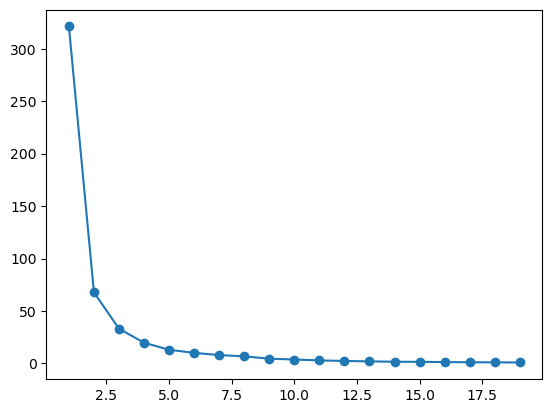

In [806]:
buscar_k(df_MMS) #Entre 4 y 5 es el K optimo
#vemos que la diferencia de incercia es menor en el punto entre 4  y 5 

In [807]:
kmeansMMSK = KMeans(n_clusters = 4, init='k-means++')#elegimos k4
predMMSK = prediccion(df_MMS, kmeansMMSK) #La inercia es de 19.73

[0 1 0 ... 0 0 0]
Inercia =  19.752471754163086


In [808]:
kmeansMMSK = KMeans(n_clusters = 5, init='k-means++')#elegimos k5
predMMSK = prediccion(df_MMS, kmeansMMSK) #La inercia bajó a 13, por lo tanto 5 tiene mejor inercia

[0 2 0 ... 0 0 4]
Inercia =  13.021125069934214


In [809]:
silhouette_MMSK = silhouette_score(df_MMS, kmeansMMSK.labels_, metric='euclidean')
print("Silhouette =", silhouette_MMSK)
#calculamos silhouette 
#vemos que entre 0 y 1 hay una consistencia clara del centroide

Silhouette = 0.6117605145697713


In [810]:
predMMSK[:150]#prediccion de los ultimos 150 valores

array([0, 2, 0, 4, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 4, 2, 0, 4, 0, 2, 0, 4,
       4, 4, 2, 0, 0, 2, 3, 4, 0, 0, 3, 0, 2, 0, 4, 0, 4, 4, 0, 0, 4, 3,
       2, 2, 4, 3, 0, 4, 0, 4, 2, 4, 4, 1, 0, 0, 3, 4, 0, 4, 0, 3, 4, 3,
       0, 0, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 2, 0, 0, 0, 4, 1, 4, 0, 3, 0,
       0, 3, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 4, 3, 0, 4, 0, 0, 2, 4, 2, 0, 2, 1, 3, 0,
       1, 3, 4, 4, 1, 2, 4, 0, 0, 4, 4, 3, 0, 0, 0, 0, 4, 0])

In [811]:
#el objetivo no es sobreajustar el modelo, si no generalizar para muestras que el modelo no ha visto, por lo que entre mas cluster 
#generamos puede ser perjudicial para el modelo ya que no podríamos generalizar

### StandardScaler

In [812]:
kmeansSS = KMeans(n_clusters=2, init='k-means++')
predSS = prediccion(df_SS, kmeansSS)

[1 0 0 ... 0 0 0]
Inercia =  4970.78241019893


In [813]:
#Modelo entrenado con StandardScaler
silhouette_SS = silhouette_score(df_MMS, kmeansSS.labels_, metric='euclidean')
print("Silhouette =", silhouette_SS)

Silhouette = 0.8110611883248606


In [814]:
predSS[:350]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Punto 1 a 2 3485.6451187298535
Punto 2 a 3 2.336181685639636
Punto 3 a 4 0.05844808082978706
Punto 4 a 5 0.7566808111450521
Punto 5 a 6 0.5173710189992542
Punto 6 a 7 0.5387856292609239
Punto 7 a 8 0.905185950823285
Punto 8 a 9 0.3895376353355025
Punto 9 a 10 1.111172612010539
Punto 10 a 11 0.5842132179958864
Punto 11 a 12 1.0856971940086166
Punto 12 a 13 0.35385743851644946
Punto 13 a 14 1.6454645349176216
Punto 14 a 15 1.2543159157019186
Punto 15 a 16 1.2468977635461258
Punto 16 a 17 0.19629690612802397
Punto 17 a 18 -0.5530959408768584
Punto 18 a 19 -8.324187871785751


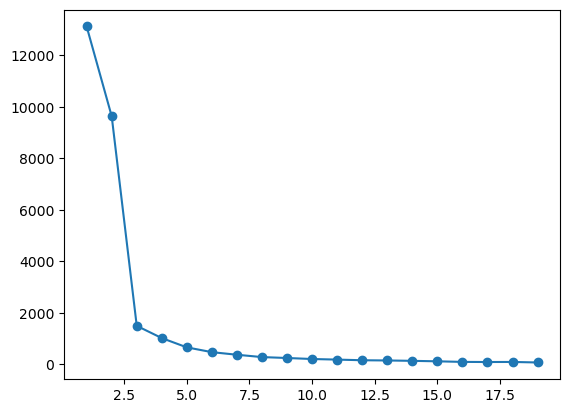

In [815]:
buscar_k(df_SS) # Entre 8 y 9 es el k optimo

In [816]:
kmeansSSK = KMeans(n_clusters = 8, init='k-means++')
predSSK = prediccion(df_SS, kmeansSSK)#La inercia bajó

[1 6 0 ... 0 0 5]
Inercia =  274.46980197637845


In [817]:
silhouette_SSK = silhouette_score(df_SS, kmeansSSK.labels_, metric='euclidean')
print("Silhouette =", silhouette_SSK)

Silhouette = 0.5415697130154867


In [818]:
kmeansSSK = KMeans(n_clusters = 6, init='k-means++')
predSSK = prediccion(df_SS, kmeansSSK)#La inercia bajó

[1 5 0 ... 0 0 0]
Inercia =  467.8207683170716


In [819]:
silhouette_SSK = silhouette_score(df_SS, kmeansSSK.labels_, metric='euclidean')
print("Silhouette =", silhouette_SSK)

Silhouette = 0.5461054852859455


In [820]:
predSSK = prediccion(df_SS, kmeansSSK)

[1 2 3 ... 3 3 3]
Inercia =  467.4666178193648


En ambos casos, la inercia se redujo considerablemente

## 6. Graficar los resultados

In [821]:
#InvoiceNo	AmountTotal	LastInvoce
def resultados(df, pred):
    df_result = df.copy()
    df_result['cluster'] = pred
    at = df_result[df_result["AmountTotal"] < 75000]
    k = at['cluster'].nunique()
    fig, axes = plt.subplots(3, 1,figsize=(16,12))
    axes[0].set_title("AmountTotal vs LastInvoce")
    axes[1].set_title("AmountTotal vs InvoiceNo")
    axes[2].set_title("LastInvoce vs InvoiceNo")
    sns.scatterplot(data=at, x=at["AmountTotal"], y=at["LastInvoce"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[0])
    sns.scatterplot(data=at, x=at["AmountTotal"], y=at["InvoiceNo"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[1])
    sns.scatterplot(data=at, x=at["LastInvoce"], y=at["InvoiceNo"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[2])

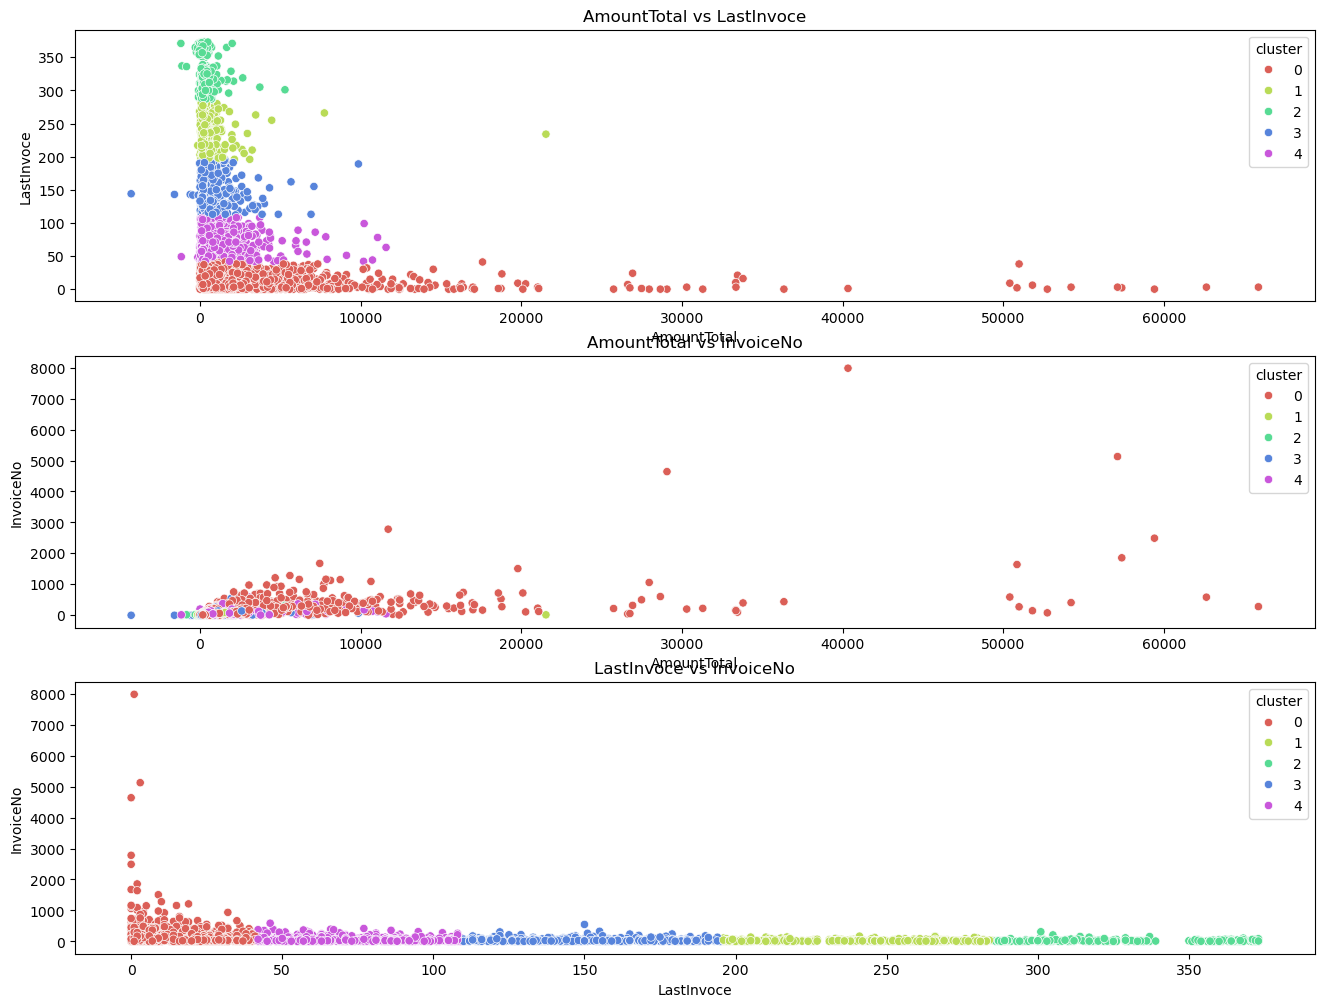

In [822]:
resultados(new_retail, predMMSK)

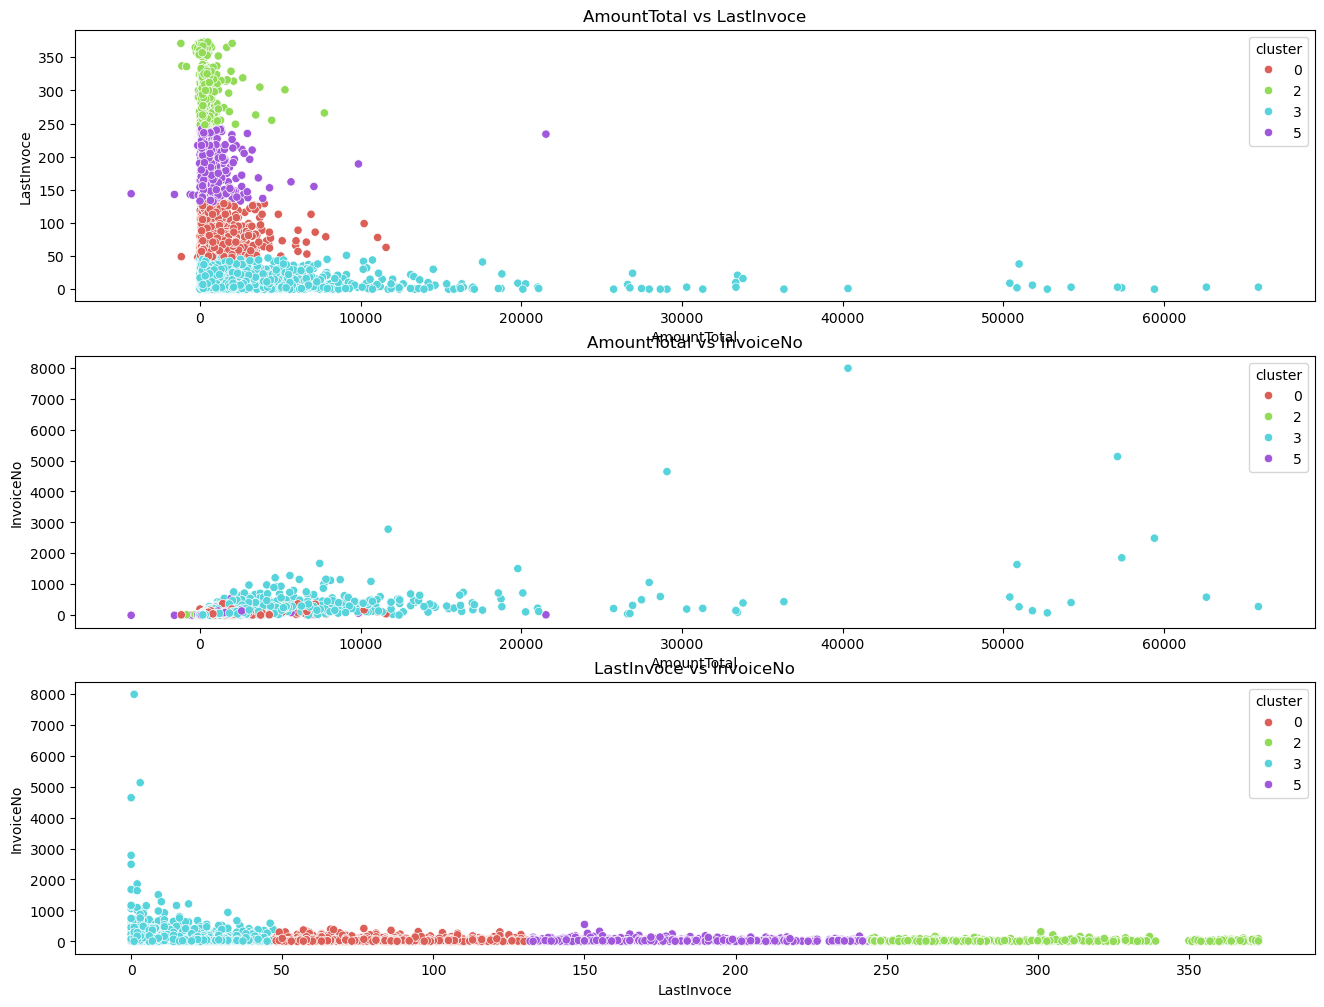

In [823]:
resultados(new_retail, predSSK)

## 7. Método Silhouette

El valor de la puntuación de Silhouette varía de -1 a 1. Si la puntuación es 1, el grupo es denso y está bien separado que otros grupos. Un valor cercano a 0 representa grupos superpuestos con muestras muy cercanas al límite de decisión de los grupos vecinos. Una puntuación negativa (-1,0) indica que las muestras pueden haber sido asignadas a grupos incorrectos.

https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [824]:
#Modelo entrenado con Minmaxscaler
silhouette_MMSk = silhouette_score(df_MMS, kmeansMMSK.labels_, metric='euclidean')
print(silhouette_MMSk)

0.6117605145697713


In [825]:
#Modelo entrenado con Standardscaler
silhouette_SSK = silhouette_score(df_SS, kmeansSSK.labels_, metric='euclidean')
print(silhouette_SSK)

0.5448950826553514


In [826]:
#Se toma el mejor modelo MMS o SC con el número de clústers que tengan mejor silhoutte

In [827]:
# ##se toma el mejor modelo MMS o SC con el numero de clusters que tengan mejor silhouette
# #se almacena el modelo con mejor prediccion 

# import pickle
# pickle.dump(model, open('modelo.fit','wb'))

# #para cargar el modelo 
# loaded_model - pickle.load(open('modelo.fit','rb'))

# #hacer predicciones
# loaded_model.predict([['4','1','5']])

en este caso vemos que usando MinMaxScaler da un valor de Silhoutte de 0.61 con k=5
por otro lado vemos que StandarSacaler da un valor de 0.51 con k=8 

en este caso vemos que tenemos mejores resultados usando MinMaxScaler

Vamos a correr el modelo usando K-medoids para comparar ambos resultados 

## 8. Práctica usando K-medoids

nuestros conjuntos de datos son los mismos


In [828]:
df_MMS

,InvoiceNo,AmountTotal,LastInvoce
CustomerID,,,
0.0,1.000000,1.000000,0.000000
12346.0,0.000007,0.002953,0.871314
12347.0,0.001355,0.005921,0.002681
12348.0,0.000225,0.004191,0.198391
12349.0,0.000539,0.004163,0.048257
...,...,...,...
18280.0,0.000067,0.003077,0.742627
18281.0,0.000045,0.003009,0.482574
18282.0,0.000090,0.003075,0.018767


In [829]:
df_SS

,InvoiceNo,AmountTotal,LastInvoce
CustomerID,,,
0.0,65.687327,61.892754,-0.903471
12346.0,-0.059826,-0.095447,2.322278
12347.0,0.028740,0.089103,-0.893545
12348.0,-0.045557,-0.018491,-0.168992
12349.0,-0.024891,-0.020190,-0.724814
...,...,...,...
18280.0,-0.055889,-0.087714,1.845860
18281.0,-0.057365,-0.091986,0.883098
18282.0,-0.054413,-0.087885,-0.833993


### 8.1. Construir el modelo

In [830]:
from sklearn_extra.cluster import KMedoids

In [831]:

#Predicción con DF y Modelo de KMEANS
def prediccion(df, model):
    model.fit(df)
    print(model.predict(df))
    print("Inercia = ", model.inertia_)
    pred = model.predict(df)
    return pred
    #k means busca la mejor forma de definir centroides para crear cluster, entre menos cluster es menor costo computacional
    #diferencia entre los datos y sus clusters
    #tratemos de utilizar la k mas pequeña

In [832]:
def buscar_k(df):
    SSE = []
    for cluster in range(1, 20):
        kmedoids = KMedoids(n_clusters=cluster, init='k-medoids++')#llamamos k-medoids
        kmedoids.fit(df)
        SSE.append(kmedoids.inertia_)
    porc = 1
    for i in range(len(SSE) - 1):
        dif = (SSE[i] - SSE[i + 1])
        print('Punto', i + 1, 'a', i + 2, dif / porc)
        porc = dif
    plt.plot(range(1, 20), SSE, 'o-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('SSE')
    plt.title('Método del codo para encontrar el número óptimo de clusters (KMedoids)')
    plt.show()

### MinMaxScaler

In [833]:
kmedoidsMMS = KMedoids(n_clusters=2, init='k-medoids++')
predMMS = prediccion(df_MMS, kmedoidsMMS)#modelo probado con k= 2, con el df de MMS 

[0 1 0 ... 0 0 0]
Inercia =  414.2402188256892


In [834]:
#Modelo entrenado con Minmaxscaler
silhouette_MMS = silhouette_score(df_MMS, kmedoidsMMS.labels_, metric='euclidean')
print("Silhouette Score =", silhouette_MMS)

Silhouette Score = 0.734996968429592


In [835]:
predMMS[:350]

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

Punto 1 a 2 446.18783225740367
Punto 2 a 3 0.2731069836223927
Punto 3 a 4 0.64265596853247
Punto 4 a 5 0.44764489250377054
Punto 5 a 6 0.7728871357035269
Punto 6 a 7 0.5258080562885624
Punto 7 a 8 0.8667469831271457
Punto 8 a 9 2.100264448907109
Punto 9 a 10 0.0310974976893704
Punto 10 a 11 15.1031190061714
Punto 11 a 12 0.5949940558527096
Punto 12 a 13 0.7201918989036946
Punto 13 a 14 0.9550600078327516
Punto 14 a 15 1.058866639820177
Punto 15 a 16 1.014426168082059
Punto 16 a 17 0.5994045428553438
Punto 17 a 18 0.5483212924041938
Punto 18 a 19 1.9304304206291452


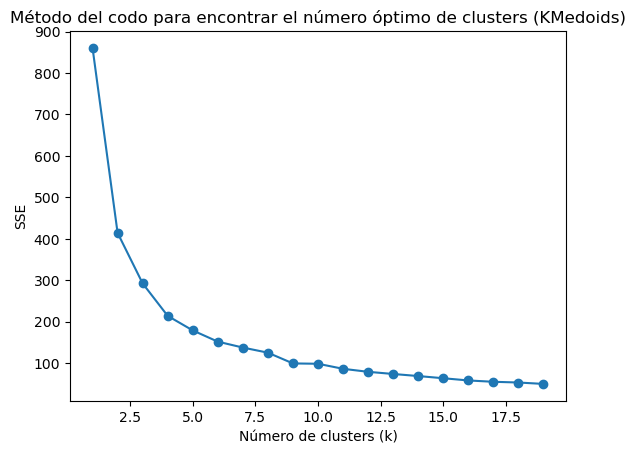

In [836]:
buscar_k(df_MMS) #Entre 3 y 5 es el K optimo

In [837]:
kmedoidsMMSK = KMedoids(n_clusters=4, init='k-medoids++')
predMMSK = prediccion(df_MMS, kmedoidsMMSK)#modelo probado con k= 4, con el df de MMS 

[0 1 0 ... 0 0 2]
Inercia =  214.07106911890168


In [838]:
silhouette_MMSK = silhouette_score(df_MMS, kmedoidsMMSK.labels_, metric='euclidean')
print("Silhouette Score =", silhouette_MMSK)
#Vemos que co n k=4 tenemos un valor de silhouette DE 0.61

Silhouette Score = 0.612629374088901


In [839]:
kmedoidsMMSL = KMedoids(n_clusters=5, init='k-medoids++')
predMMSL = prediccion(df_MMS, kmedoidsMMSL)#modelo probado con k= 2, con el df de MMS 

[1 0 1 ... 1 1 3]
Inercia =  178.3947416093771


In [841]:
silhouette_MMSL = silhouette_score(df_MMS, kmedoidsMMSL.labels_, metric='euclidean')
print("Silhouette Score =", silhouette_MMSL)
#Vemos que co n k=5 tenemos un valor de silhouette de 0.5

Silhouette Score = 0.606700952643713


In [843]:
predMMSK[:150]#nos quedamos con k=4

array([0, 1, 0, 2, 0, 1, 0, 3, 1, 3, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2,
       2, 2, 1, 0, 0, 1, 3, 2, 0, 0, 3, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 3,
       1, 1, 2, 3, 0, 2, 0, 2, 1, 2, 2, 3, 0, 0, 2, 2, 0, 2, 0, 3, 2, 3,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 3, 0,
       0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 3, 0,
       1, 3, 2, 2, 1, 1, 2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 2, 0], dtype=int64)

### StandardScaler

In [846]:
kmedoidsSS = KMedoids(n_clusters=2, init='k-medoids++')#usamos k=2
predSS = prediccion(df_SS, kmedoidsSS)

[0 1 0 ... 0 0 0]
Inercia =  1804.2759639529281


In [847]:
silhouette_SS = silhouette_score(df_SS, kmedoidsSS.labels_, metric='euclidean')
print("Silhouette Score =", silhouette_SS)

Silhouette Score = 0.7006317513734583


Punto 1 a 2 90.30544923832758
Punto 2 a 3 17.945199489652097
Punto 3 a 4 0.016658185879456354
Punto 4 a 5 15.448604524259432
Punto 5 a 6 0.7392048007858508
Punto 6 a 7 0.06886999470623402
Punto 7 a 8 6.101372897921615
Punto 8 a 9 0.7075999364105228
Punto 9 a 10 0.6713246024836768
Punto 10 a 11 0.659988662154053
Punto 11 a 12 -0.1508061743268223
Punto 12 a 13 -14.433401370867923
Punto 13 a 14 -0.03324598964064579
Punto 14 a 15 -17.257844437709124
Punto 15 a 16 0.6580426645070999
Punto 16 a 17 -0.009181130708426577
Punto 17 a 18 -48.03825041153559
Punto 18 a 19 1.1919283771189928


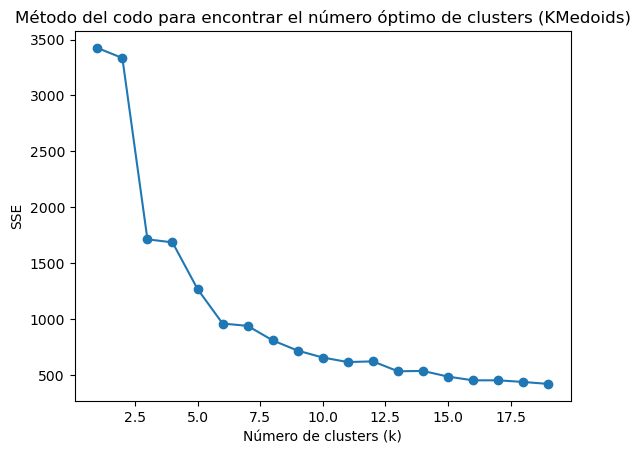

In [848]:
buscar_k(df_SS) # Entre 3 y 5 esta la k optima, tambien hay un codo entre 6 y 8 

In [849]:
kmedoidsSSA = KMedoids(n_clusters=4, init='k-medoids++')#usamos k=4
predSSA = prediccion(df_SS, kmedoidsSSA)

[1 2 0 ... 0 0 0]
Inercia =  1296.9215834903118


In [851]:
silhouette_SSA = silhouette_score(df_MMS, kmedoidsSSA.labels_, metric='euclidean')
print("Silhouette Score =", silhouette_SSA)
#con k=4 el valor de silohuette es de 0.64

Silhouette Score = 0.6496000439687885


In [852]:
kmedoidsSSK = KMedoids(n_clusters=5, init='k-medoids++')#usamos k=5
predSSK = prediccion(df_SS, kmedoidsSSK)

[1 2 0 ... 0 0 0]
Inercia =  1264.35265509376


In [868]:
silhouette_SSK = silhouette_score(df_SS, kmedoidsSSK.labels_, metric='euclidean')
print("Silhouette =", silhouette_SSK)
#con k=5 el valor de silohuette es de 0.60

Silhouette = 0.6080918157548036


In [871]:
kmedoidsSSN = KMedoids(n_clusters=3, init='k-medoids++')#usamos k=3
predSSN = prediccion(df_SS, kmedoidsSSN)

[1 2 0 ... 0 0 0]
Inercia =  1713.9797344214335


In [872]:
silhouette_SSN= silhouette_score(df_SS, kmedoidsSSN.labels_, metric='euclidean')
print("Silhouette =", silhouette_SSN)
#Silohuette es de 0.70 con k=3

Silhouette = 0.7091474521713729


In [864]:
predSSN= prediccion(df_SS, kmedoidsSSN)

[1 2 0 ... 0 0 0]
Inercia =  1713.9797344214335


In [880]:
#en la grafica se observa que hay otro codo entre 10 y 11, se probó el modelo con k=10
kmedoidsSSb = KMedoids(n_clusters=10, init='k-medoids++')#usamos k=3
predSSb = prediccion(df_SS, kmedoidsSSb)

[2 7 0 ... 0 0 5]
Inercia =  707.9710678201261


In [884]:
#vemos que con esta k=11 el valor de silhouette baja hasta 0.52, por lo tanto nos quedamos con k=3
silhouette_SSb= silhouette_score(df_SS, kmedoidsSSb.labels_, metric='euclidean')
print("Silhouette =", silhouette_SSb)

Silhouette = 0.5233427056315296


In [885]:
predSSN[:150]#nos quedamos con k=3

array([1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0], dtype=int64)

## 8.2 Graficar los resultados

In [858]:
#InvoiceNo	AmountTotal	LastInvoce
def resultados(df, pred):
    df_result = df.copy()
    df_result['cluster'] = pred
    at = df_result[df_result["AmountTotal"] < 75000]
    k = at['cluster'].nunique()
    fig, axes = plt.subplots(3, 1,figsize=(16,12))
    axes[0].set_title("AmountTotal vs LastInvoce")
    axes[1].set_title("AmountTotal vs InvoiceNo")
    axes[2].set_title("LastInvoce vs InvoiceNo")
    sns.scatterplot(data=at, x=at["AmountTotal"], y=at["LastInvoce"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[0])
    sns.scatterplot(data=at, x=at["AmountTotal"], y=at["InvoiceNo"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[1])
    sns.scatterplot(data=at, x=at["LastInvoce"], y=at["InvoiceNo"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[2])

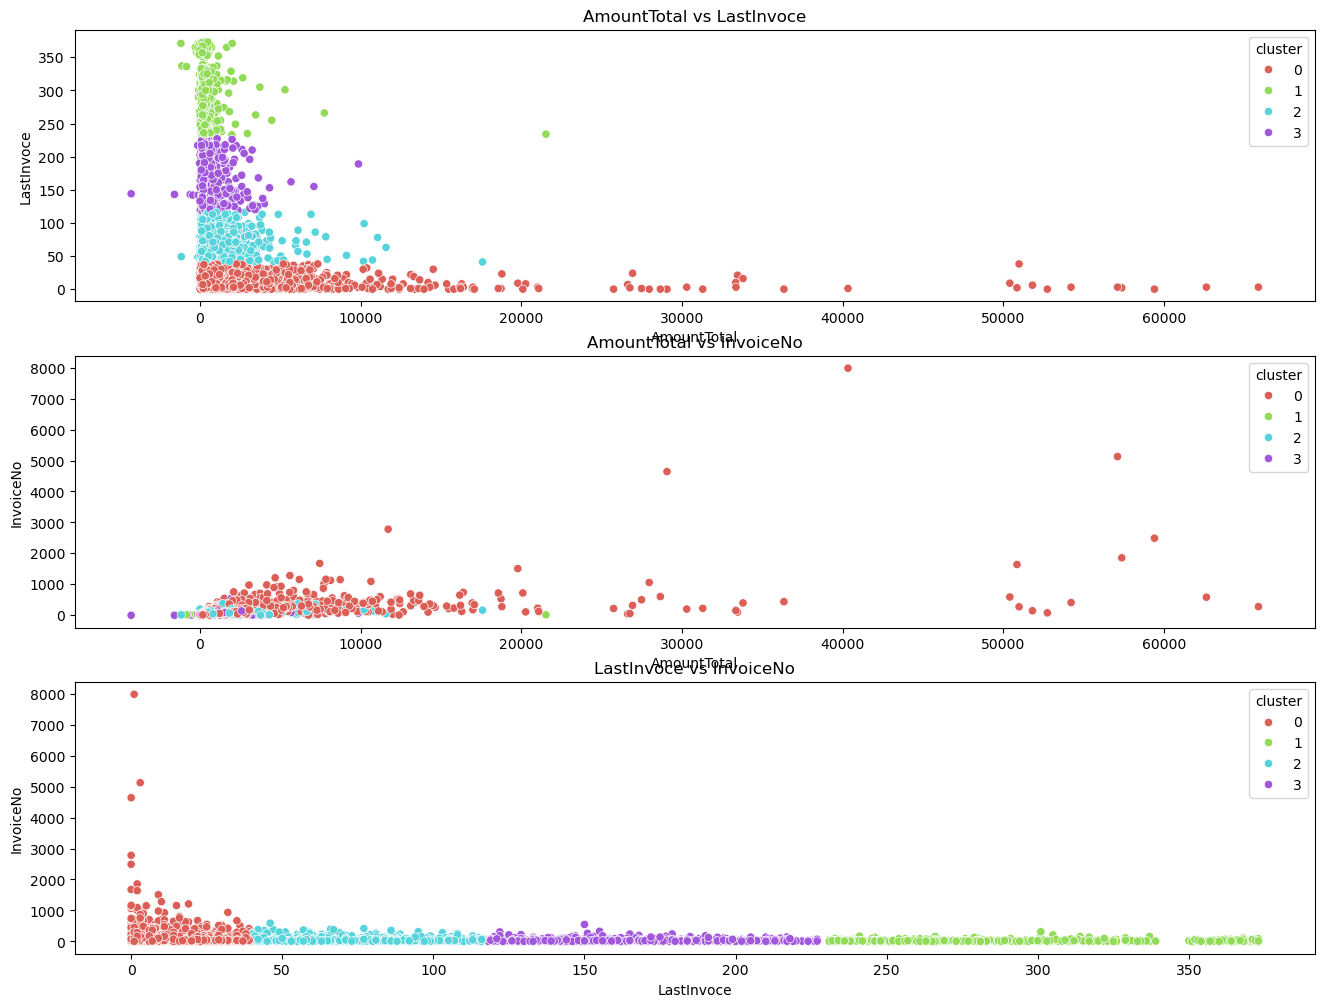

In [859]:
resultados(new_retail, predMMSK)

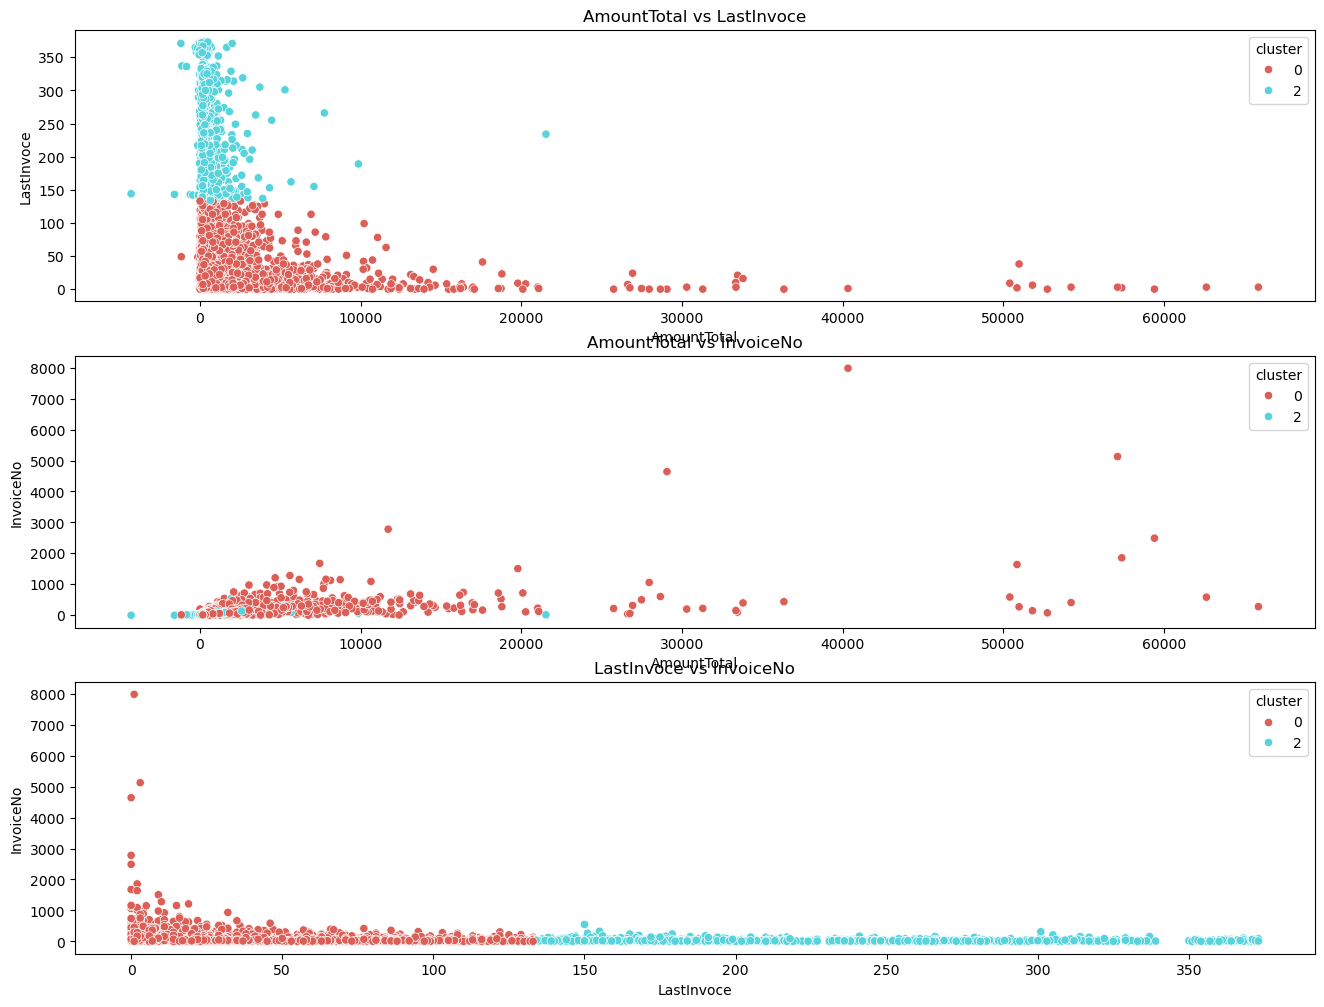

In [886]:
resultados(new_retail, predSSN)

In [870]:
#Modelo entrenado con MinMaxscaler, k=4
silhouette_MMSK = silhouette_score(df_MMS, kmedoidsMMSK.labels_, metric='euclidean')
print("Silhouette Score =", silhouette_MMSK)

Silhouette Score = 0.612629374088901


In [889]:
#Modelo entrenado con Standardscaler, k=3
silhouette_SSN= silhouette_score(df_SS, kmedoidsSSN.labels_, metric='euclidean')
print(silhouette_SSN)

0.7091474521713729


## 8.3 Conclusiones

En esta práctica se construyó un modelo K-medoids para hacer clustering, se obtuvieron las métricas de inercia y silhouette. 

Usando K.means se concluye que:

- usando MinMaxScaler y una k=5  el valor de Silhoutte es de 0.61 
- usando StandarSacaler y una k= 8, el valor de Silohuette es de 0.54

Usando Kmeans vemos que obtenemos mejores resultados con MinMaxScaler

Usando Kmedoids se concluye que:

- usando MinMaxScaler y una k=4  el valor de Silhoutte es de 0.61
- usando StandarSacaler y una k= 3, el valor de Silohuette es de 0.70

Usando Kmedoids vemos que obtenemos mejores resultados con StandarScaler
  
